hierarchical connection is of two types:
 bottom up apprach until single cluster-agglomerative clustering
 divisive clustering-top down
 from single cluster at top to many clusters
 
aglomerative clustering:based on distance matrix and dendrogram(like tree that shows hierarchicy )
distance matrix is created based on euclidean distance or any (distance between data points).
then from it:take linkage(like min/max/avg distance) and create cluster based on those two point and then till u get final cluster u do this.
then after getting dendrogram and find longest vertical line that has no horizontal line passed through it.
then u can ge number of clusters from it 

Unsupervised learning is a type of machine learning that uses unlabeled data to train machines. Unlabeled data doesn’t have a fixed output variable. The model learns from the data, discovers the patterns and features in the data, and returns the output. 

Let say, we have a dataset which is cluttered and we have a collection of pictures of different fruits, we freeze this data to the model and model analyzes the data and figure out pattern in it and at the end it categorizes the images into three types based i.e. Apple, Mango, and Avocado on its similarities. 

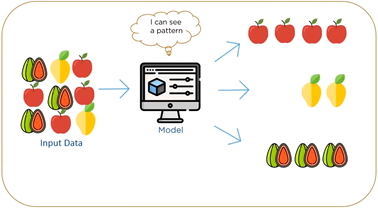

## Unsupervised Learning Algorithms

<div>
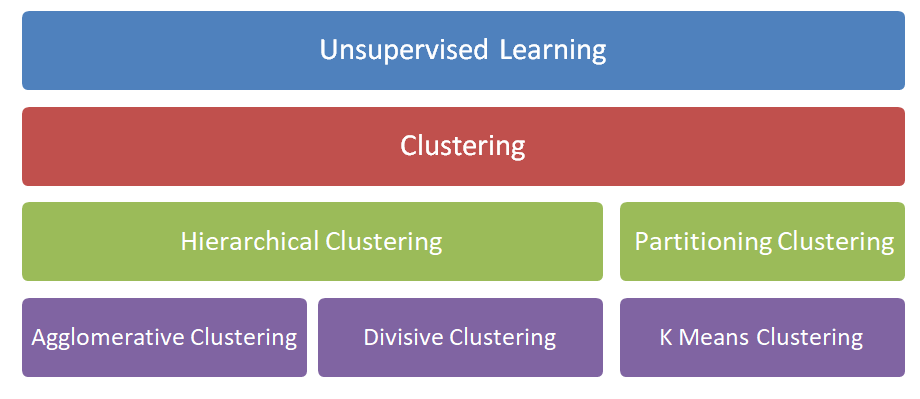
</div>

## Hierarchical Clustering

Hierarchical clustering, as the name suggests is an algorithm that builds hierarchy of clusters. For example, all files and folders on the hard disk are organized in a hierarchy.

In hierarchical clustering, we assign each object (data point) to a separate cluster. Then compute the distance (similarity) between each of the clusters and join the two most similar clusters. In the end, this algorithm terminates when there is only a single cluster left.

Hierarchical clustering is where you build a cluster tree (a Dendrogram) to represent data, where each group (or “node”) links to two or more successor groups. The groups are nested and organized as a tree, which ideally ends up as a meaningful classification scheme.

The results of hierarchical clustering can be shown using Dendrogram with 3 clusters as shown below.

<div>
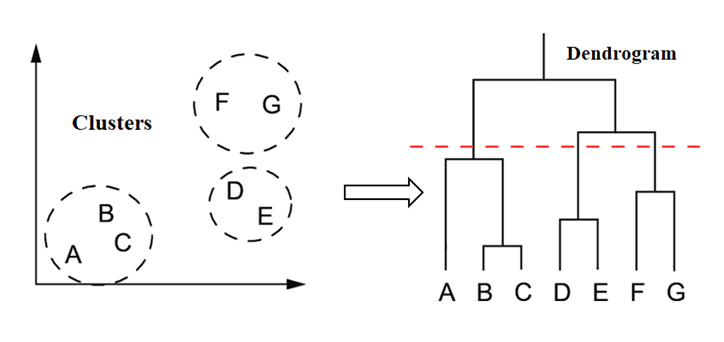
</div>

## What is a Dendrogram?

A Dendrogram is a type of tree diagram showing hierarchical clustering — relationships between similar sets of data. They are frequently used in biology to show clustering between genes or samples, but they can represent any type of grouped data.

The results of hierarchical clustering can be shown using Dendrogram. 

## Unsupervised Learning

<div>
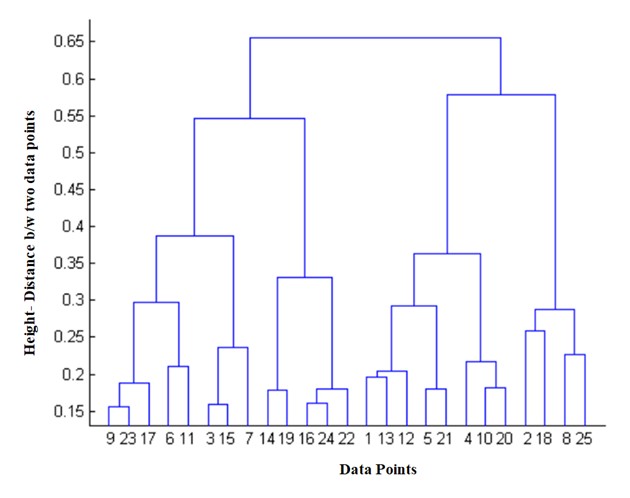
</div>

At the bottom, we start with 25 data points, each assigned to separate clusters. Two closest clusters are then merged till we have just one cluster at the top. The height in the Dendrogram at which two clusters are merged represents the distance between two clusters in the data space.

The decision of the no. of clusters that can best depict different groups can be chosen by observing the Dendrogram. The best choice of the no. of clusters is the no. of vertical lines in the 

Dendrogram cut by a horizontal line that can transverse the maximum distance vertically without intersecting a cluster.

In the above example, the best choice of no. of clusters will be 4 as the red horizontal line in the Dendrogram below covers maximum vertical distance AB as shown in the Figure below.

<div>
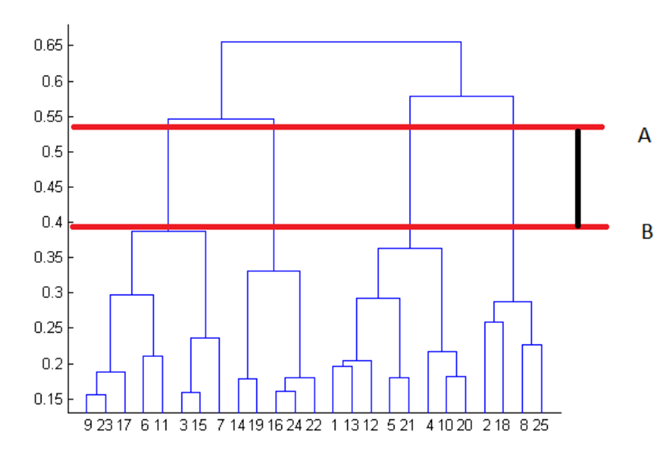
</div>

Two important things that you should know about hierarchical clustering are:
1.	This algorithm has been implemented above using bottom up approach. It is also possible to follow top-down approach starting with all data points assigned in the same cluster and recursively performing splits till each data point is assigned a separate cluster.
2.	The decision of merging two clusters is taken on the basis of closeness of these clusters. There are multiple metrics for deciding the closeness of two clusters(a, b):

    a.	Euclidean distance: ||a-b||2 = √(Σ(ai-bi))<br>
    b.	Squared Euclidean distance: ||a-b||22 = Σ((ai-bi)2)<br>
    c.	Manhattan distance: ||a-b||1 = Σ|ai-bi|<br>
    d.	Maximum distance:||a-b||INFINITY = maxi|ai-bi|<br>


## Types of Hierarchical Clustering

<div>
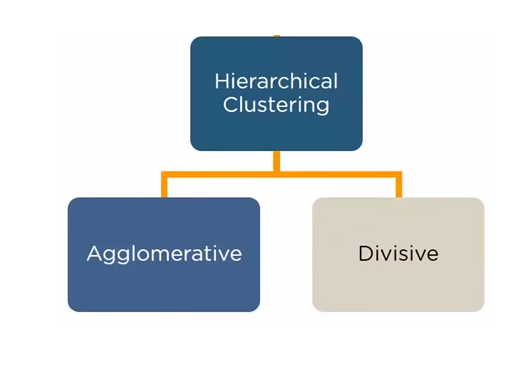
</div>

### Agglomerative Clustering

In agglomerative clustering, there is a bottom-up approach. We begin with each element as a separate cluster and merge them into successively more massive clusters, 

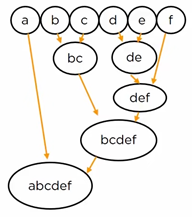

For example, we have a, b, c, d, e, and f. We start combining b and c as common cluster then we combine d and e and then d, e, and f and then combing {b, c} to that and finally combining a to that and it becomes a bigger cluster.

For the one dimensional data set {7, 10, 20, 28, 35}, perform hierarchical clustering and plot the Dendrogram to visualize it. 

For the one dimensional data set {7, 10, 20, 28, 35}, perform hierarchical clustering and plot the Dendrogram to visualize it. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

    ‘ward’ minimizes the variance of the clusters being merged.
    ‘average’ uses the average of the distances of each observation of the two sets.
    ‘complete’ or ‘maximum’ linkage uses the maximum distances between all observations of the two sets.
    ‘single’ uses the minimum of the distances between all observations of the two sets.


Single Linkage: In single link hierarchical clustering, we merge in each step the two clusters, whose two closest members have the smallest distance 

<div>
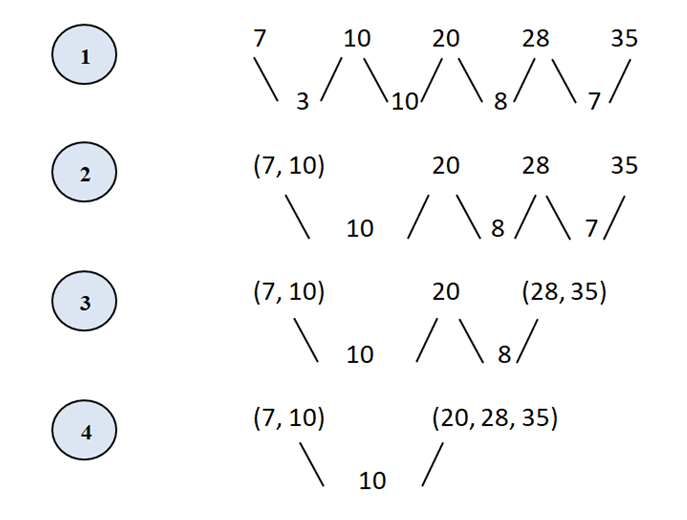
</div>

Using single linkage two clusters are formed:<br>
Cluster 1: (7, 10) and <br>
Cluster 2: (20, 28, 35)

### Complete Linkage: 

In complete link hierarchical clustering, we merge in the members of the clusters in each step, which provide the smallest maximum pairwise distance 

<div>
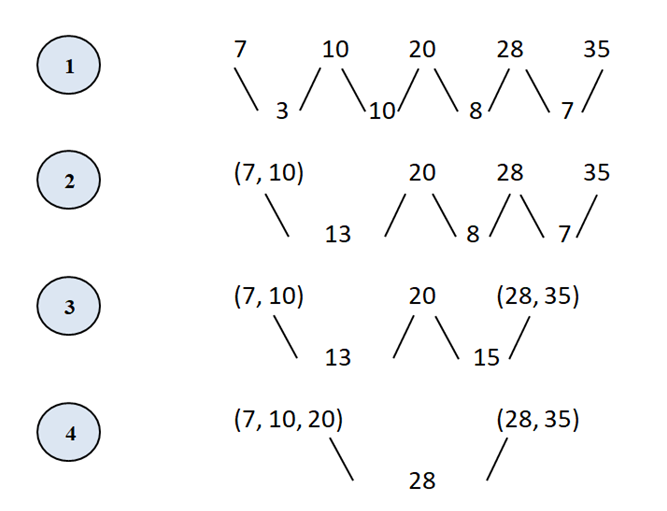
</div>

Using complete linkage two clusters are formed:<br>
Cluster 1: (7, 10, 20) and<br>
Cluster 2: (28, 35)

    
### Conclusion: 

Hierarchical clustering is mostly used when the application requires a hierarchy, e.g. creation of taxonomy. However, they are expensive in terms of their computational and storage requirements.


### Divisive Clustering

Divisive clustering is a top-down approach. We begin with the whole set and proceed to divide it into successively smaller clusters. 

So this clustering approach is exactly opposite to Agglomerative clustering.

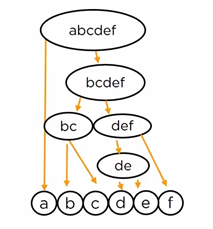

## Demo 4.1: Hierarchical Clustering

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

### Loading Data

In [2]:
customer_df = pd.read_csv('DS2_C6_S3_MallCustomers_Data_Concept.csv')
customer_df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Preprocessing Data

In [3]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


There is no huge difference in the scales of Age, Annual Income and Spending Score features, so ne need to scale this dataset.

CustomerID and Genre are irrelevant fields and can be dropped. Create a matrix of independent variables by select only Age and Annual Income.

In [4]:
X = customer_df.iloc[:, [3, 4]].values

In [10]:
X[:10,:]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40],
       [17, 76],
       [18,  6],
       [18, 94],
       [19,  3],
       [19, 72]], dtype=int64)

# Concept Session

### Plotting Dendogram

We need to choose the number of clusters and for doing this, we’ll use Dendrograms.

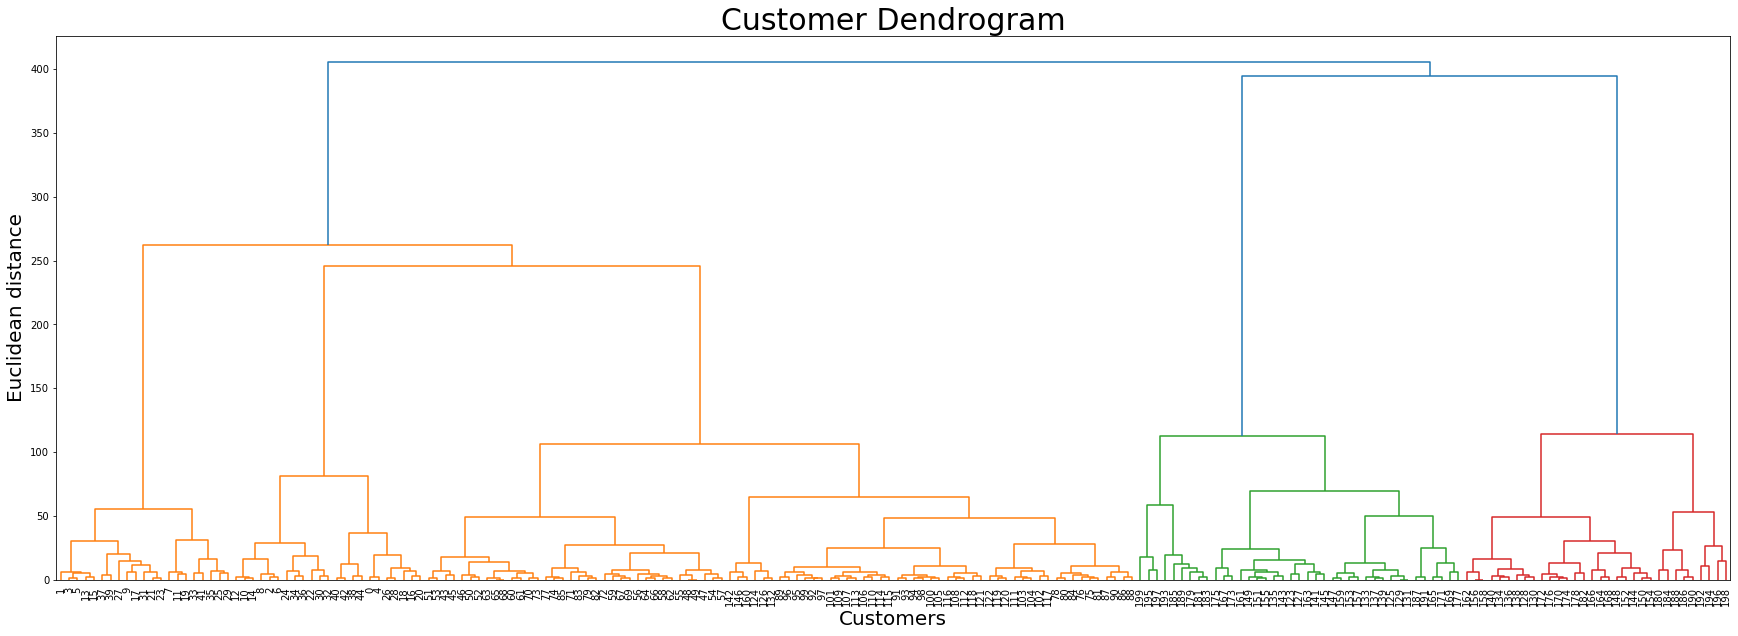

In [5]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=customer_df.index)
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()

The x-axis contains the samples and y-axis represents the distance between these samples. The vertical line with the maximum distance is the blue line and hence we can decide a threshold of 200 and cut the dendrogram:

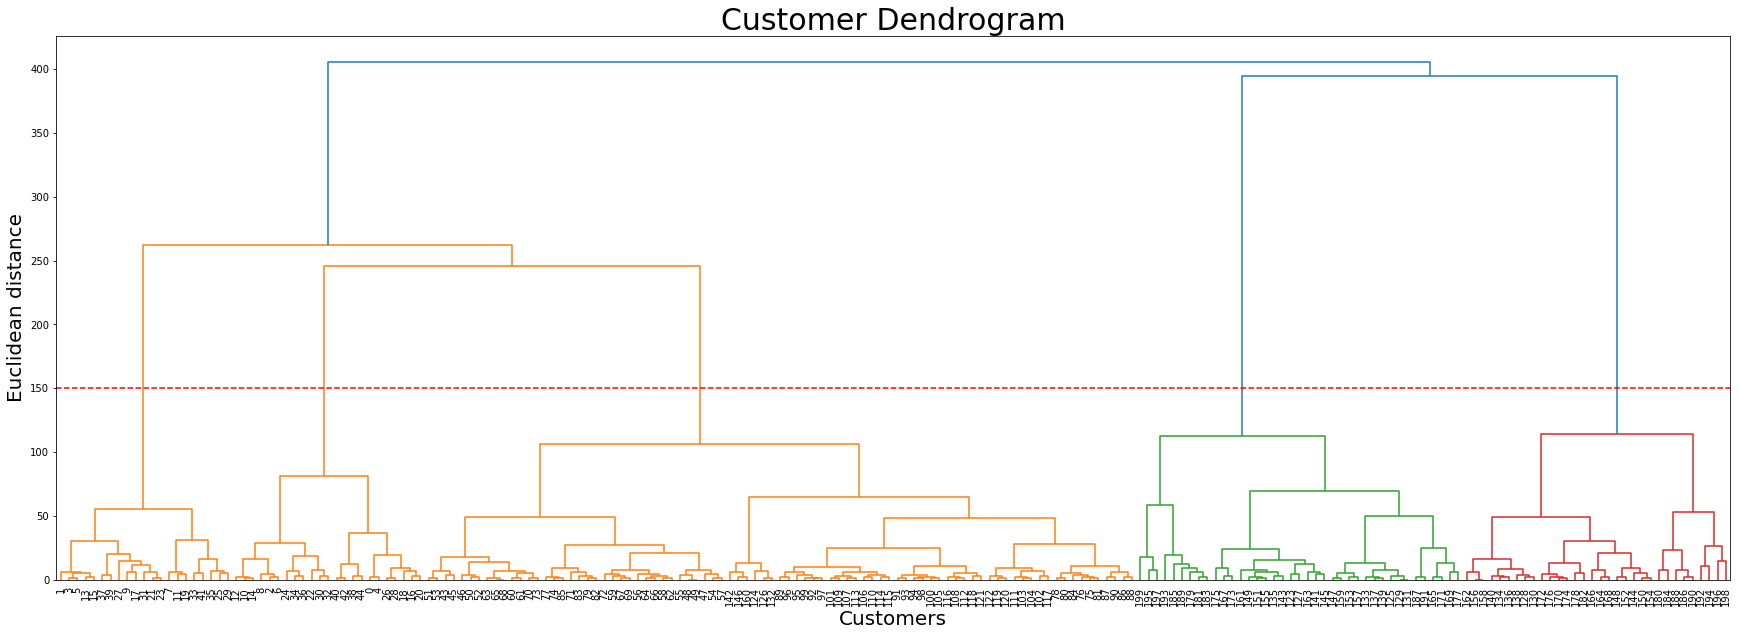

In [6]:
plt.figure(figsize=(30, 10))
dendrogrm = sch.dendrogram(sch.linkage(X, method = 'ward'),labels=customer_df.index)
plt.axhline(y=150, color='r', linestyle='--')
ax = plt.gca()
ax.tick_params(axis='x', which='major', labelsize=10)
plt.title('Customer Dendrogram',fontsize=30)
plt.xlabel('Customers',fontsize=20)
plt.ylabel('Euclidean distance', fontsize=20)
plt.show()


In our case, it's 5. So let's fit the Agglomerative model with 5 clusters.

### Model Building

In [7]:
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)


### Visualising Clusters

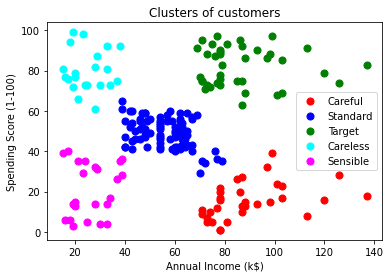

In [8]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 50, c = 'red', label = 'Careful')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 50, c = 'blue', label = 'Standard')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 50, c = 'green', label = 'Target')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 50, c = 'cyan', label = 'Careless')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 50, c = 'magenta', label = 'Sensible')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()


A cluster of customers based on their annual income and spending score.